In [ ]:
import numpy as np
import pandas as pd
import random
from pprint import pprint

In [ ]:
#1) Cargar los datos
datosIris = pd.read_csv("https://raw.githubusercontent.com/adrishg/Intersemestral_MachineLearning_Proteco2020/master/DataSets/iris.csv")
datosIris = datosIris.drop("Id", axis=1)
encabezadoDeColumnas = datosIris.columns.tolist()#Crea lista encabezados
datosIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#2) Función que separa training set y test set
def separacionDatosTesteo(datosIris, tamanioTest = 0.2):
  if isinstance(tamanioTest, float):
    tamanioTest = round(tamanioTest * len(datosIris))
  
  indices = datosIris.index.tolist()
  testIndices = random.sample(population=indices, k=tamanioTest)

  datosTesteo = datosIris.loc[testIndices]
  datosEntrenamiento = datosIris.drop(testIndices)

  return datosEntrenamiento, datosTesteo

In [ ]:
datosEntrenamiento, datosTesteo = separacionDatosTesteo(datosIris)

In [ ]:
data = datosEntrenamiento.values
#data

In [ ]:
#3) Función para calcular pureza
def calcularPureza(datos):
  etiquetas = datos[:,-1] #Recuperan las etiquetas
  etiquetasUnicas = np.unique(etiquetas) #Obtenemos etiquetas únicas
  if len(etiquetasUnicas)==1:
    return True
  else:
    return False

calcularPureza(data)

False

In [ ]:
#4) Clasificar los datos por su etiqueta
def clasificarDatos(data):
  etiquetas=data[:,-1]
  etiquetasUnicas, cuentaDeEtiquetasUnicas = np.unique(etiquetas, return_counts=True)
  index = cuentaDeEtiquetasUnicas.argmax()
  clasificacion = etiquetasUnicas[index]

  return clasificacion

In [ ]:
#5) Encontrar separaciones posibles
def separacionesPosibles(data):
  separaciones = {}
  x, numeroDeColumnas = data.shape
  
  for i in range(numeroDeColumnas-1):
    separaciones[i] = []
    valores = data[:,i]
    valoresUnicos = np.unique(valores)

    for indice in range(len(valoresUnicos)):
      if indice != 0:
        valorActual = valoresUnicos[indice]
        valorAnterior = valoresUnicos[indice-1]
        separacionPosible = (valorActual+valorAnterior)/2
        
        separaciones[i].append(separacionPosible)

  return separaciones

#separacionesPosibles(data)

In [ ]:
#6) Separe los datos
def separarDatos(data, separadorColumna, separadorValor):
  separarValoresColumnas = data[:,separadorColumna]
  datosIzquierda = data[separarValoresColumnas <= separadorValor]
  datosDerecha = data[separarValoresColumnas > separadorValor]

  return datosIzquierda, datosDerecha

In [ ]:
#7) Calcular la entropía
def calcularEntropia(datos):
  etiquetas = datos[:,-1]
  x, cuenta = np.unique(etiquetas, return_counts=True)
  probabilidad = cuenta/cuenta.sum()
  entropia = sum(probabilidad * -np.log2(probabilidad))
  return entropia

In [ ]:
#8) Calcular Entropía Total 
def calcularEntropiaTotal(datosIzquierda, datosDerecha):
  n = len(datosIzquierda)+len(datosDerecha)
  proporcionIzquierda = len(datosIzquierda)/n
  proporcionDerecha = len(datosDerecha)/n

  entropiaTotal = (proporcionIzquierda*calcularEntropia(datosIzquierda)+proporcionDerecha*calcularEntropia(datosDerecha))
  return entropiaTotal

In [ ]:
#9) Minimizar la entropía iterando sobre los posibles umbrales y las posibles
#columnas (característica k)
def mejorSeparacion(data, separaciones):
  mejorSeparacion, mejorColumna = 0,0
  entropia = calcularEntropiaTotal(*separarDatos(data, separadorColumna=0, separadorValor=0))
  for i in separaciones: 
    for valor in separaciones[i]:
      datosIzquierda, datosDerecha = separarDatos(data, separadorColumna=i, separadorValor=valor)
      entropiaActualTotal = calcularEntropiaTotal(datosIzquierda, datosDerecha)
      if entropiaActualTotal < entropia:
        entropia = entropiaActualTotal
        mejorColumna = i
        mejorSeparacion = valor
  return mejorColumna, mejorSeparacion

In [ ]:
#10) Función de arbolDeDecision(). Utiliza recursividad y manda a llamar a las demás funciones.
def arbolDeDecision(data, contador=0, minMuestras=2, profundidadMaxima = 4):
  datosIris = data
  #Casos base:
  #1)La función de pureza regresa un True
  #2)Si el número de muestra es menor al mínimo(2)
  #3)Que se alcance la profunidad máxima
  if (calcularPureza(data)) or (len(data)<minMuestras) or (contador==profundidadMaxima):
    clasificacion = clasificarDatos(data)
    return clasificacion
  else:
    contador += 1
    separaciones = separacionesPosibles(datosIris)
    mejorColumna, mejorValorDeSeparacion = mejorSeparacion(datosIris, separaciones)
    datosIzquierda, datosDerecha = separarDatos(datosIris, mejorColumna, mejorValorDeSeparacion)

    pregunta = "{} <= {}".format(encabezadoDeColumnas[mejorColumna], mejorValorDeSeparacion)
    subArbol = {pregunta: []}

    si = arbolDeDecision(datosIzquierda, contador, minMuestras, profundidadMaxima)
    no = arbolDeDecision(datosDerecha, contador, minMuestras, profundidadMaxima)

    if si==no:
      subArbol = si
    else:
      subArbol[pregunta].append(si)
      subArbol[pregunta].append(no)
    return subArbol

In [ ]:
arbol = arbolDeDecision(data)
pprint(arbol)

{'petal_length <= 2.5999999999999996': ['Iris-setosa',
                                        {'petal_width <= 1.75': [{'petal_length <= 4.95': [{'sepal_length <= 4.95': ['Iris-virginica',
                                                                                                                     'Iris-versicolor']},
                                                                                           {'petal_width <= 1.55': ['Iris-virginica',
                                                                                                                    'Iris-versicolor']}]},
                                                                 {'petal_length <= 4.85': [{'sepal_length <= 5.95': ['Iris-versicolor',
                                                                                                                     'Iris-virginica']},
                                                                                           'Iris-virginica']}]}]}


In [ ]:
#Tomamos uno de los datos de testeo
#Aquí se podría utilizar un índice aleatorio
ejemplo = datosTesteo.iloc[0]
ejemplo

sepal_length                  6
sepal_width                 3.4
petal_length                4.5
petal_width                 1.6
species         Iris-versicolor
Name: 85, dtype: object

In [ ]:
#Los datos de nuestra selección los pasamos a un diccionario 
diccionario= {'sepal_length': ejemplo[0], 'sepal_width': ejemplo[1], 
            'petal_length': ejemplo[2],'petal_width': ejemplo[3], 
            'species': ejemplo[4]}
print(diccionario)

{'sepal_length': 6.0, 'sepal_width': 3.4, 'petal_length': 4.5, 'petal_width': 1.6, 'species': 'Iris-versicolor'}


In [ ]:
#Ahora intentaremos hacer que una predicción a partir de nuestro modelo.
def ejemploClasificacion(ejemplo, arbol):
  pregunta= list(arbol.keys())[0]#Obtiene la pregunta del arbol
  nombreCaracteristica, operador, valor = pregunta.split(" ")#Utilizando los espacios obtiene esas variables
  if ejemplo[nombreCaracteristica] <= float(valor):#Realiza un casteo para generar la pregunta
    respuesta= arbol[pregunta][0]#Se da la respuesta si la condición es cierta
  else:
    respuesta= arbol[pregunta][1]#Se da la respuesta si la condición es falsa

  #Si el valor de la respuesta que se tiene es otro diccionario se llama recursivamente a esta función
  #Dejaremos de llamar recursivamente hasta llegar a un nodo hoja donde estará la predicción
  if not isinstance(respuesta, dict):
    return respuesta #Si la respuesta no es un diccionario regrésala
  else:
    restoDelArbol = respuesta 
    return ejemploClasificacion(ejemplo, restoDelArbol)#Llamada recursiva

ejemploClasificacion(diccionario, arbol)

'Iris-versicolor'

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

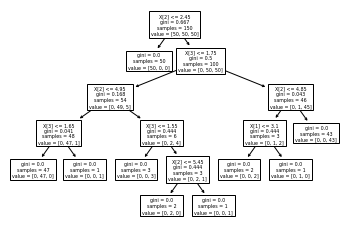

In [ ]:
tree.plot_tree(clf)